In [1]:
#Packages related to general operating system & warnings
import os 
import warnings
warnings.filterwarnings('ignore')
#Packages related to data importing, manipulation, exploratory data analysis, data understanding
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
#import pandas_profiling
import scipy.stats as stats
#Packages related to data visualizaiton
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#Setting plot sizes and type of plot
plt.rc("font", size=14)
plt.rcParams['axes.grid'] = True
plt.figure(figsize=(6,3))
plt.gray()

<Figure size 600x300 with 0 Axes>

In [2]:
from matplotlib.backends.backend_pdf import PdfPages
#Modules related to split the data & gridsearch
from sklearn.model_selection import train_test_split, GridSearchCV
#Module related to calculation of metrics
from sklearn import metrics
#Module related to VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor
#Modules related to preprocessing (Imputation of missings, standardiszation, new features creation, converting categorical to numerical)
from sklearn.impute import MissingIndicator, SimpleImputer
#from sklearn.preprocessing import Imputer, PolynomialFeatures, KBinsDiscretizer, FunctionTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, LabelBinarizer, OrdinalEncoder
#Modules related to feature selection
from sklearn.feature_selection import RFE, RFECV, SelectKBest, chi2, SelectPercentile, f_classif, mutual_info_classif, f_regression

In [3]:
back=pd.read_csv("Data_of_Attack_Back (1).csv")

In [4]:
back.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0.0,0,0,0.0,0.5454,0.08314,0,0,0,0.2,...,0.001,0.001,0.1,0,0.100,0,0.0,0.0,0.0,0.0
1,0.0,0,0,0.0,0.5454,0.08314,0,0,0,0.2,...,0.002,0.002,0.1,0,0.050,0,0.0,0.0,0.0,0.0
2,0.0,0,0,0.0,0.5454,0.08314,0,0,0,0.2,...,0.003,0.003,0.1,0,0.033,0,0.0,0.0,0.0,0.0
3,0.0,0,0,0.0,0.5454,0.08314,0,0,0,0.2,...,0.004,0.004,0.1,0,0.025,0,0.0,0.0,0.0,0.0
4,0.0,0,0,0.0,0.5454,0.08314,0,0,0,0.2,...,0.005,0.005,0.1,0,0.020,0,0.0,0.0,0.0,0.0


In [5]:
back['Attack']='back'

In [6]:
back.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Attack
0,0.0,0,0,0.0,0.5454,0.08314,0,0,0,0.2,...,0.001,0.1,0,0.100,0,0.0,0.0,0.0,0.0,back
1,0.0,0,0,0.0,0.5454,0.08314,0,0,0,0.2,...,0.002,0.1,0,0.050,0,0.0,0.0,0.0,0.0,back
2,0.0,0,0,0.0,0.5454,0.08314,0,0,0,0.2,...,0.003,0.1,0,0.033,0,0.0,0.0,0.0,0.0,back
3,0.0,0,0,0.0,0.5454,0.08314,0,0,0,0.2,...,0.004,0.1,0,0.025,0,0.0,0.0,0.0,0.0,back
4,0.0,0,0,0.0,0.5454,0.08314,0,0,0,0.2,...,0.005,0.1,0,0.020,0,0.0,0.0,0.0,0.0,back


In [7]:
buffer=pd.read_csv("Data_of_Attack_Back_BufferOverflow (1).csv")

In [8]:
buffer.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0.0184,0,0.05,0.0,0.01511,0.02957,0,0,0,0.3,...,0.001,0.003,0.1,0,0.10,0.067,0,0,0.0,0.0
1,0.0305,0,0.05,0.0,0.01735,0.02766,0,0,0,0.3,...,0.002,0.004,0.1,0,0.05,0.050,0,0,0.0,0.0
2,0.0150,0,0.05,0.0,0.01587,0.06707,0,0,0,0.1,...,0.001,0.001,0.1,0,0.10,0.000,0,0,0.0,0.0
3,0.0060,0,0.05,0.0,0.02328,0.04551,0,0,0,0.3,...,0.001,0.001,0.1,0,0.10,0.000,0,0,0.0,0.0
4,0.0158,0,0.05,0.0,0.01567,0.03095,0,0,0,0.3,...,0.002,0.002,0.1,0,0.05,0.000,0,0,0.0,0.0


In [9]:
buffer['Attack']='Buffer'

In [10]:
buffer.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Attack
0,0.0184,0,0.05,0.0,0.01511,0.02957,0,0,0,0.3,...,0.003,0.1,0,0.10,0.067,0,0,0.0,0.0,Buffer
1,0.0305,0,0.05,0.0,0.01735,0.02766,0,0,0,0.3,...,0.004,0.1,0,0.05,0.050,0,0,0.0,0.0,Buffer
2,0.0150,0,0.05,0.0,0.01587,0.06707,0,0,0,0.1,...,0.001,0.1,0,0.10,0.000,0,0,0.0,0.0,Buffer
3,0.0060,0,0.05,0.0,0.02328,0.04551,0,0,0,0.3,...,0.001,0.1,0,0.10,0.000,0,0,0.0,0.0,Buffer
4,0.0158,0,0.05,0.0,0.01567,0.03095,0,0,0,0.3,...,0.002,0.1,0,0.05,0.000,0,0,0.0,0.0,Buffer


In [11]:
ftp=pd.read_csv("Data_of_Attack_Back_FTPWrite (1).csv")

In [12]:
ftp_clm=ftp.columns

In [13]:
ftp.head()

,0.0026,0,0.07,0.3,0.00116,0.00451,0.4,0.5,0.6,0.2,...,0.001.2,0.001.3,0.1.5,0.21,0.1.6,0.22,0.23,0.24,0.25,0.26
0,0.0134,0,0.34,0,0.00100,0.39445,0,0,0.2,0.0,...,0.002,0.001,0.05,0.1,0.05,0.000,0,0,0,0
1,0.0000,0,0.14,0,0.00613,0.00000,0,0,0.0,0.0,...,0.001,0.084,0.10,0.0,0.10,0.002,0,0,0,0
2,0.0000,0,0.14,0,0.00000,0.00005,0,0,0.0,0.0,...,0.002,0.085,0.10,0.0,0.10,0.002,0,0,0,0
3,0.0032,0,0.07,0,0.00104,0.00449,0,0,0.0,0.2,...,0.001,0.001,0.10,0.0,0.10,0.000,0,0,0,0
4,0.0067,0,0.34,0,0.00157,0.02703,0,0,0.1,0.0,...,0.002,0.001,0.05,0.1,0.05,0.000,0,0,0,0


In [14]:
ftp["Attack"]="FTP"

In [15]:
ftp.rename = pd.DataFrame(ftp)
ftp.columns = ['duration', ' protocol_type', ' service', ' flag', ' src_bytes',
       ' dst_bytes', ' land', ' wrong_fragment', ' urgent', ' hot',
       ' num_failed_logins', ' logged_in', ' num_compromised', ' root_shell',
       ' su_attempted', ' num_root', ' num_file_creations', ' num_shells',
       ' num_access_files', ' num_outbound_cmds', ' is_host_login',
       ' is_guest_login', ' count', ' srv_count', ' serror_rate',
       ' srv_error_rate', ' rerror_rate', ' srv_rerror_rate', ' same_srv_rate',
       ' diff_srv_rate', ' srv_diff_host_rate', ' dst_host_count',
       ' dst_host_srv_count', ' dst_host_same_srv_rate',
       ' dst_host_diff_srv_rate', ' dst_host_same_src_port_rate',
       ' dst_host_srv_diff_host_rate', ' dst_host_serror_rate',
       ' dst_host_srv_serror_rate', ' dst_host_rerror_rate',
       ' dst_host_srv_rerror_rate', 'Attack']

In [16]:
ftp.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Attack
0,0.0134,0,0.34,0,0.00100,0.39445,0,0,0.2,0.0,...,0.001,0.05,0.1,0.05,0.000,0,0,0,0,FTP
1,0.0000,0,0.14,0,0.00613,0.00000,0,0,0.0,0.0,...,0.084,0.10,0.0,0.10,0.002,0,0,0,0,FTP
2,0.0000,0,0.14,0,0.00000,0.00005,0,0,0.0,0.0,...,0.085,0.10,0.0,0.10,0.002,0,0,0,0,FTP
3,0.0032,0,0.07,0,0.00104,0.00449,0,0,0.0,0.2,...,0.001,0.10,0.0,0.10,0.000,0,0,0,0,FTP
4,0.0067,0,0.34,0,0.00157,0.02703,0,0,0.1,0.0,...,0.001,0.05,0.1,0.05,0.000,0,0,0,0,FTP


In [17]:
guess_pass=pd.read_csv('Data_of_Attack_Back_GuessPassword (1).csv')

In [18]:
guess_pass.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0.0023,0,0.05,0.00,0.00104,0.00276,0,0,0,0.0,...,0.001,0.002,0.1,0,0.100,0.1,0.000,0.000,0.000,0.000
1,0.0060,0,0.05,0.03,0.00125,0.00179,0,0,0,0.1,...,0.001,0.001,0.1,0,0.100,0.0,0.100,0.100,0.000,0.000
2,0.0000,0,0.05,0.06,0.00125,0.00179,0,0,0,0.1,...,0.002,0.002,0.1,0,0.050,0.0,0.050,0.050,0.050,0.050
3,0.0000,0,0.05,0.06,0.00125,0.00179,0,0,0,0.1,...,0.003,0.003,0.1,0,0.033,0.0,0.033,0.033,0.067,0.067
4,0.0000,0,0.05,0.06,0.00125,0.00179,0,0,0,0.1,...,0.004,0.004,0.1,0,0.025,0.0,0.025,0.025,0.075,0.075


In [19]:
guess_pass['Attack']="guess_pass"

In [20]:
guess_pass.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Attack
0,0.0023,0,0.05,0.00,0.00104,0.00276,0,0,0,0.0,...,0.002,0.1,0,0.100,0.1,0.000,0.000,0.000,0.000,guess_pass
1,0.0060,0,0.05,0.03,0.00125,0.00179,0,0,0,0.1,...,0.001,0.1,0,0.100,0.0,0.100,0.100,0.000,0.000,guess_pass
2,0.0000,0,0.05,0.06,0.00125,0.00179,0,0,0,0.1,...,0.002,0.1,0,0.050,0.0,0.050,0.050,0.050,0.050,guess_pass
3,0.0000,0,0.05,0.06,0.00125,0.00179,0,0,0,0.1,...,0.003,0.1,0,0.033,0.0,0.033,0.033,0.067,0.067,guess_pass
4,0.0000,0,0.05,0.06,0.00125,0.00179,0,0,0,0.1,...,0.004,0.1,0,0.025,0.0,0.025,0.025,0.075,0.075,guess_pass


In [21]:
neptune=pd.read_csv('Data_of_Attack_Back_Neptune (1).csv')

In [22]:
neptune['Attack']='neptune'

In [23]:
neptune.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Attack
0,0.0,0,0.05,0.07,0.0,0.0,0,0,0,0,...,0.002,0.1,0.0,0.100,0.100,0.1,0.050,0.0,0.0,neptune
1,0.0,0,0.05,0.07,0.0,0.0,0,0,0,0,...,0.003,0.1,0.0,0.050,0.067,0.1,0.067,0.0,0.0,neptune
2,0.0,0,0.05,0.07,0.0,0.0,0,0,0,0,...,0.004,0.1,0.0,0.033,0.050,0.1,0.075,0.0,0.0,neptune
3,0.0,0,0.05,0.07,0.0,0.0,0,0,0,0,...,0.005,0.1,0.0,0.025,0.040,0.1,0.080,0.0,0.0,neptune
4,0.0,0,0.05,0.07,0.0,0.0,0,0,0,0,...,0.006,0.1,0.0,0.020,0.033,0.1,0.083,0.0,0.0,neptune


In [24]:
nmap=pd.read_csv('Data_of_Attack_Back_NMap.csv')

In [25]:
nmap.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,0.02,0.06,0.0,0.00008,0.0,0,0,0,0,...,0.003,0.001,0.033,0.100,0.033,0.0,0.0,0.0,0,0
1,0,0.02,0.06,0.0,0.00008,0.0,0,0,0,0,...,0.004,0.002,0.050,0.075,0.050,0.0,0.0,0.0,0,0
2,0,0.02,0.06,0.0,0.00008,0.0,0,0,0,0,...,0.005,0.003,0.060,0.060,0.060,0.0,0.0,0.0,0,0
3,0,0.02,0.06,0.0,0.00008,0.0,0,0,0,0,...,0.006,0.004,0.067,0.050,0.067,0.0,0.0,0.0,0,0
4,0,0.02,0.06,0.0,0.00008,0.0,0,0,0,0,...,0.007,0.005,0.071,0.043,0.071,0.0,0.0,0.0,0,0


In [26]:
nmap['Attack']="Nmap"

In [27]:
nmap.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Attack
0,0,0.02,0.06,0.0,0.00008,0.0,0,0,0,0,...,0.001,0.033,0.100,0.033,0.0,0.0,0.0,0,0,Nmap
1,0,0.02,0.06,0.0,0.00008,0.0,0,0,0,0,...,0.002,0.050,0.075,0.050,0.0,0.0,0.0,0,0,Nmap
2,0,0.02,0.06,0.0,0.00008,0.0,0,0,0,0,...,0.003,0.060,0.060,0.060,0.0,0.0,0.0,0,0,Nmap
3,0,0.02,0.06,0.0,0.00008,0.0,0,0,0,0,...,0.004,0.067,0.050,0.067,0.0,0.0,0.0,0,0,Nmap
4,0,0.02,0.06,0.0,0.00008,0.0,0,0,0,0,...,0.005,0.071,0.043,0.071,0.0,0.0,0.0,0,0,Nmap


In [28]:
normal=pd.read_csv("Data_of_Attack_Back_Normal.csv")

In [29]:
normal.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0.0,0.0,0.0,0.0,0.00215,0.45076,0,0,0.0,0.0,...,0.000,0.000,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.00162,0.04528,0,0,0.0,0.0,...,0.001,0.001,0.1,0.0,0.100,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.00236,0.01228,0,0,0.0,0.0,...,0.002,0.002,0.1,0.0,0.050,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.00233,0.02032,0,0,0.0,0.0,...,0.003,0.003,0.1,0.0,0.033,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.00239,0.00486,0,0,0.0,0.0,...,0.004,0.004,0.1,0.0,0.025,0.0,0.0,0.0,0.0,0.0


In [30]:
normal['Attack']="normal"

In [31]:
normal.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Attack
0,0.0,0.0,0.0,0.0,0.00215,0.45076,0,0,0.0,0.0,...,0.000,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,normal
1,0.0,0.0,0.0,0.0,0.00162,0.04528,0,0,0.0,0.0,...,0.001,0.1,0.0,0.100,0.0,0.0,0.0,0.0,0.0,normal
2,0.0,0.0,0.0,0.0,0.00236,0.01228,0,0,0.0,0.0,...,0.002,0.1,0.0,0.050,0.0,0.0,0.0,0.0,0.0,normal
3,0.0,0.0,0.0,0.0,0.00233,0.02032,0,0,0.0,0.0,...,0.003,0.1,0.0,0.033,0.0,0.0,0.0,0.0,0.0,normal
4,0.0,0.0,0.0,0.0,0.00239,0.00486,0,0,0.0,0.0,...,0.004,0.1,0.0,0.025,0.0,0.0,0.0,0.0,0.0,normal


In [32]:
portsweep=pd.read_csv('Data_of_Attack_Back_PortSweep.csv')

In [33]:
portsweep.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0.0000,0.0,0.14,0.05,0.0,0.0,0,0,0,0.0,...,0.171,0.062,0.027,0.002,0.001,0.003,0.001,0.0,0.029,0.002
1,0.0001,0.0,0.14,0.08,0.0,0.0,0,0,0,0.0,...,0.172,0.062,0.027,0.002,0.001,0.003,0.001,0.0,0.030,0.003
2,0.0000,0.0,0.12,0.05,0.0,0.0,0,0,0,0.0,...,0.173,0.001,0.001,0.003,0.002,0.000,0.001,0.0,0.030,0.100
3,0.0001,0.0,0.12,0.08,0.0,0.0,0,0,0,0.0,...,0.174,0.002,0.001,0.003,0.002,0.000,0.001,0.0,0.030,0.100
4,0.0000,0.0,0.12,0.05,0.0,0.0,0,0,0,0.0,...,0.175,0.001,0.001,0.003,0.003,0.000,0.001,0.0,0.031,0.100


In [34]:
portsweep.shape

(2964, 41)

In [35]:

portsweep['Attack']="portsweep"

In [36]:
portsweep.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Attack
0,0.0000,0.0,0.14,0.05,0.0,0.0,0,0,0,0.0,...,0.062,0.027,0.002,0.001,0.003,0.001,0.0,0.029,0.002,portsweep
1,0.0001,0.0,0.14,0.08,0.0,0.0,0,0,0,0.0,...,0.062,0.027,0.002,0.001,0.003,0.001,0.0,0.030,0.003,portsweep
2,0.0000,0.0,0.12,0.05,0.0,0.0,0,0,0,0.0,...,0.001,0.001,0.003,0.002,0.000,0.001,0.0,0.030,0.100,portsweep
3,0.0001,0.0,0.12,0.08,0.0,0.0,0,0,0,0.0,...,0.002,0.001,0.003,0.002,0.000,0.001,0.0,0.030,0.100,portsweep
4,0.0000,0.0,0.12,0.05,0.0,0.0,0,0,0,0.0,...,0.001,0.001,0.003,0.003,0.000,0.001,0.0,0.031,0.100,portsweep


In [37]:
rootkit=pd.read_csv('Data_of_Attack_Back_RootKit.csv')

In [38]:
rootkit.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0.0060,0.0,0.05,0,0.00086,0.00183,0,0,0.0,0.0,...,0.255,0.001,0.000,0.002,0.0,0.0,0,0.0,0.0,0.0
1,0.0060,0.0,0.05,0,0.00090,0.00233,0,0,0.0,0.0,...,0.255,0.002,0.001,0.002,0.0,0.0,0,0.0,0.0,0.0
2,0.0708,0.0,0.05,0,0.01727,0.24080,0,0,0.0,0.0,...,0.255,0.003,0.001,0.002,0.0,0.0,0,0.0,0.0,0.0
3,0.0021,0.0,0.07,0,0.00089,0.00345,0,0,0.0,0.1,...,0.255,0.001,0.000,0.002,0.0,0.0,0,0.0,0.0,0.0
4,0.0098,0.0,0.05,0,0.00621,0.08356,0,0,0.1,0.1,...,0.255,0.004,0.002,0.002,0.0,0.0,0,0.0,0.0,0.0


In [39]:
rootkit['Attack']='rootkit'

In [40]:
rootkit.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Attack
0,0.0060,0.0,0.05,0,0.00086,0.00183,0,0,0.0,0.0,...,0.001,0.000,0.002,0.0,0.0,0,0.0,0.0,0.0,rootkit
1,0.0060,0.0,0.05,0,0.00090,0.00233,0,0,0.0,0.0,...,0.002,0.001,0.002,0.0,0.0,0,0.0,0.0,0.0,rootkit
2,0.0708,0.0,0.05,0,0.01727,0.24080,0,0,0.0,0.0,...,0.003,0.001,0.002,0.0,0.0,0,0.0,0.0,0.0,rootkit
3,0.0021,0.0,0.07,0,0.00089,0.00345,0,0,0.0,0.1,...,0.001,0.000,0.002,0.0,0.0,0,0.0,0.0,0.0,rootkit
4,0.0098,0.0,0.05,0,0.00621,0.08356,0,0,0.1,0.1,...,0.004,0.002,0.002,0.0,0.0,0,0.0,0.0,0.0,rootkit


In [41]:
satan=pd.read_csv("Data_of_Attack_Back_Satan.csv")

In [42]:
satan.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0.0,0.02,0.06,0.0,0.00020,0.0,0,0,0,0.0,...,0.143,0.001,0.001,0.004,0.001,0.0,0.001,0.0,0.0,0.0
1,0.0,0.02,0.06,0.0,0.00020,0.0,0,0,0,0.0,...,0.144,0.002,0.001,0.004,0.002,0.0,0.001,0.0,0.0,0.0
2,0.0,0.02,0.06,0.0,0.00020,0.0,0,0,0,0.0,...,0.145,0.003,0.002,0.004,0.003,0.0,0.001,0.0,0.0,0.0
3,0.0,0.01,0.12,0.0,0.00001,0.0,0,0,0,0.0,...,0.146,0.001,0.001,0.005,0.001,0.0,0.001,0.0,0.0,0.0
4,0.0,0.01,0.12,0.0,0.00001,0.0,0,0,0,0.0,...,0.147,0.002,0.001,0.005,0.001,0.0,0.001,0.0,0.0,0.0


In [43]:
satan['Attack']="satan"

In [44]:
satan.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Attack
0,0.0,0.02,0.06,0.0,0.00020,0.0,0,0,0,0.0,...,0.001,0.001,0.004,0.001,0.0,0.001,0.0,0.0,0.0,satan
1,0.0,0.02,0.06,0.0,0.00020,0.0,0,0,0,0.0,...,0.002,0.001,0.004,0.002,0.0,0.001,0.0,0.0,0.0,satan
2,0.0,0.02,0.06,0.0,0.00020,0.0,0,0,0,0.0,...,0.003,0.002,0.004,0.003,0.0,0.001,0.0,0.0,0.0,satan
3,0.0,0.01,0.12,0.0,0.00001,0.0,0,0,0,0.0,...,0.001,0.001,0.005,0.001,0.0,0.001,0.0,0.0,0.0,satan
4,0.0,0.01,0.12,0.0,0.00001,0.0,0,0,0,0.0,...,0.002,0.001,0.005,0.001,0.0,0.001,0.0,0.0,0.0,satan


In [45]:
smurf=pd.read_csv("Data_of_Attack_Back_Smurf.csv")

In [46]:
smurf.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,0.02,0.09,0,0.01032,0,0,0.0,0,0,...,0.146,0.001,0.001,0.002,0.001,0,0.0,0,0.0,0
1,0,0.02,0.09,0,0.01032,0,0,0.0,0,0,...,0.147,0.002,0.001,0.002,0.001,0,0.0,0,0.0,0
2,0,0.02,0.09,0,0.01032,0,0,0.0,0,0,...,0.148,0.003,0.002,0.002,0.002,0,0.0,0,0.0,0
3,0,0.02,0.09,0,0.01032,0,0,0.0,0,0,...,0.149,0.004,0.003,0.002,0.003,0,0.0,0,0.0,0
4,0,0.02,0.09,0,0.01032,0,0,0.0,0,0,...,0.150,0.005,0.003,0.002,0.003,0,0.0,0,0.0,0


In [47]:
smurf['Attack']="smurf"

In [48]:
smurf.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Attack
0,0,0.02,0.09,0,0.01032,0,0,0.0,0,0,...,0.001,0.001,0.002,0.001,0,0.0,0,0.0,0,smurf
1,0,0.02,0.09,0,0.01032,0,0,0.0,0,0,...,0.002,0.001,0.002,0.001,0,0.0,0,0.0,0,smurf
2,0,0.02,0.09,0,0.01032,0,0,0.0,0,0,...,0.003,0.002,0.002,0.002,0,0.0,0,0.0,0,smurf
3,0,0.02,0.09,0,0.01032,0,0,0.0,0,0,...,0.004,0.003,0.002,0.003,0,0.0,0,0.0,0,smurf
4,0,0.02,0.09,0,0.01032,0,0,0.0,0,0,...,0.005,0.003,0.002,0.003,0,0.0,0,0.0,0,smurf


In [49]:
data=pd.concat([back,buffer,ftp,guess_pass,neptune,nmap,normal,portsweep,rootkit,satan,smurf], axis = 0)

In [50]:
data.rename = pd.DataFrame(ftp)
data.columns = ['duration', ' protocol_type', ' service', ' flag1', ' src_bytes',
       ' dst_bytes', ' land', ' wrong_fragment', ' urgent', ' hot',
       ' num_failed_logins', ' logged_in', ' num_compromised', ' root_shell',
       ' su_attempted', ' num_root', ' num_file_creations', ' num_shells',
       ' num_access_files', ' num_outbound_cmds', ' is_host_login',
       ' is_guest_login', ' count1', ' srv_count', ' serror_rate',
       ' srv_error_rate', ' rerror_rate', ' srv_rerror_rate', ' same_srv_rate',
       ' diff_srv_rate', ' srv_diff_host_rate', ' dst_host_count',
       ' dst_host_srv_count', ' dst_host_same_srv_rate',
       ' dst_host_diff_srv_rate', ' dst_host_same_src_port_rate',
       ' dst_host_srv_diff_host_rate', ' dst_host_serror_rate',
       ' dst_host_srv_serror_rate', ' dst_host_rerror_rate',
       ' dst_host_srv_rerror_rate', 'Attack']

In [51]:
#checking the variables for naming convencsion 
data.columns

Index(['duration', ' protocol_type', ' service', ' flag1', ' src_bytes',
       ' dst_bytes', ' land', ' wrong_fragment', ' urgent', ' hot',
       ' num_failed_logins', ' logged_in', ' num_compromised', ' root_shell',
       ' su_attempted', ' num_root', ' num_file_creations', ' num_shells',
       ' num_access_files', ' num_outbound_cmds', ' is_host_login',
       ' is_guest_login', ' count1', ' srv_count', ' serror_rate',
       ' srv_error_rate', ' rerror_rate', ' srv_rerror_rate', ' same_srv_rate',
       ' diff_srv_rate', ' srv_diff_host_rate', ' dst_host_count',
       ' dst_host_srv_count', ' dst_host_same_srv_rate',
       ' dst_host_diff_srv_rate', ' dst_host_same_src_port_rate',
       ' dst_host_srv_diff_host_rate', ' dst_host_serror_rate',
       ' dst_host_srv_serror_rate', ' dst_host_rerror_rate',
       ' dst_host_srv_rerror_rate', 'Attack'],
      dtype='object')

In [52]:
#naming the variables as per the naming convencion 
data.columns=[i.replace(" ","") for i in data.columns]

In [53]:
data.head()

,duration,protocol_type,service,flag1,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Attack
0,0.0,0.0,0.0,0.0,0.5454,0.08314,0,0.0,0.0,0.2,...,0.001,0.1,0.0,0.100,0.0,0.0,0.0,0.0,0.0,back
1,0.0,0.0,0.0,0.0,0.5454,0.08314,0,0.0,0.0,0.2,...,0.002,0.1,0.0,0.050,0.0,0.0,0.0,0.0,0.0,back
2,0.0,0.0,0.0,0.0,0.5454,0.08314,0,0.0,0.0,0.2,...,0.003,0.1,0.0,0.033,0.0,0.0,0.0,0.0,0.0,back
3,0.0,0.0,0.0,0.0,0.5454,0.08314,0,0.0,0.0,0.2,...,0.004,0.1,0.0,0.025,0.0,0.0,0.0,0.0,0.0,back
4,0.0,0.0,0.0,0.0,0.5454,0.08314,0,0.0,0.0,0.2,...,0.005,0.1,0.0,0.020,0.0,0.0,0.0,0.0,0.0,back


In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 817550 entries, 0 to 3006
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     817550 non-null  float64
 1   protocol_type                817550 non-null  float64
 2   service                      817550 non-null  float64
 3   flag1                        817550 non-null  float64
 4   src_bytes                    817550 non-null  float64
 5   dst_bytes                    817550 non-null  float64
 6   land                         817550 non-null  int64  
 7   wrong_fragment               817550 non-null  float64
 8   urgent                       817550 non-null  float64
 9   hot                          817550 non-null  float64
 10  num_failed_logins            817550 non-null  float64
 11  logged_in                    817550 non-null  float64
 12  num_compromised              817550 non-null  float64
 13  root_s

In [55]:
# clm=['back','buffer','ftp','guess_pass','neptune','nmap','normal','portsweep','rootkit','satan','smurf']
# for i in clm:
#     print(i.shape)

In [56]:
data.shape

(817550, 42)

In [57]:
#checking the no of unique vlaues in attack column
data["Attack"].nunique()

11

In [58]:
#checking if the data is balanced or not 
data["Attack"].value_counts()

Attack
normal        576710
neptune       227228
satan           5019
smurf           3007
portsweep       2964
Nmap            1554
back             968
guess_pass        53
Buffer            30
rootkit           10
FTP                7
Name: count, dtype: int64

<Axes: xlabel='Attack'>

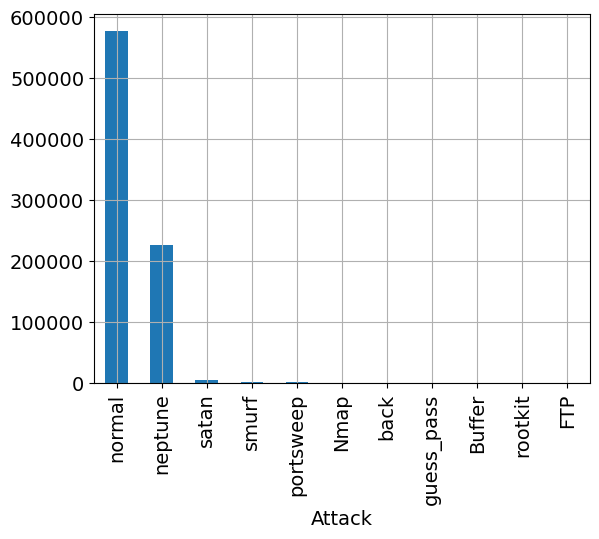

In [59]:
data["Attack"].value_counts().plot(kind="bar")

In [60]:
#Using pandas groupby, separate the datasets into groups based on their attacks and random sample from each group based on population proportion. The total sample size is 60%(0.6) of the population
sample = data.groupby('Attack', group_keys=False).apply(lambda x: x.sample(frac=0.6))

In [61]:
sample.head()

,duration,protocol_type,service,flag1,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Attack
10,0.0000,0.0,0.14,0.0,0.00000,0.02072,0,0.0,0.0,0.1,...,0.004,0.1,0.0,0.100,0.0,0.0,0.0,0.0,0.0,Buffer
4,0.0158,0.0,0.05,0.0,0.01567,0.03095,0,0.0,0.0,0.3,...,0.002,0.1,0.0,0.050,0.0,0.0,0.0,0.0,0.0,Buffer
7,0.0000,0.0,0.14,0.0,0.00000,0.05690,0,0.0,0.0,0.0,...,0.001,0.1,0.0,0.100,0.0,0.0,0.0,0.0,0.0,Buffer
24,0.0127,0.0,0.05,0.0,0.01567,0.02736,0,0.0,0.0,0.1,...,0.005,0.1,0.0,0.020,0.0,0.0,0.0,0.0,0.0,Buffer
22,0.0033,0.0,0.05,0.0,0.02402,0.03815,0,0.0,0.0,0.3,...,0.003,0.1,0.0,0.033,0.0,0.0,0.0,0.0,0.0,Buffer


In [62]:
sample.tail()

,duration,protocol_type,service,flag1,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Attack
842,0.0,0.02,0.09,0.0,0.01032,0.0,0,0.0,0.0,0.0,...,0.090,0.035,0.002,0.035,0.0,0.002,0.0,0.000,0.0,smurf
1953,0.0,0.02,0.09,0.0,0.01032,0.0,0,0.0,0.0,0.0,...,0.216,0.085,0.002,0.085,0.0,0.000,0.0,0.010,0.0,smurf
1278,0.0,0.02,0.09,0.0,0.01032,0.0,0,0.0,0.0,0.0,...,0.037,0.015,0.004,0.015,0.0,0.027,0.0,0.002,0.0,smurf
12,0.0,0.02,0.09,0.0,0.01032,0.0,0,0.0,0.0,0.0,...,0.013,0.008,0.002,0.008,0.0,0.000,0.0,0.000,0.0,smurf
2996,0.0,0.02,0.09,0.0,0.01032,0.0,0,0.0,0.0,0.0,...,0.245,0.096,0.001,0.096,0.0,0.000,0.0,0.000,0.0,smurf


In [63]:
#checking the shape of our sample dataset
sample.shape

(490529, 42)

In [64]:
#Checking the proportions of the cyber attacks in the sample dataset.
((sample['Attack'].value_counts()) / len(sample) * 100).round(2)

Attack
normal        70.54
neptune       27.79
satan          0.61
smurf          0.37
portsweep      0.36
Nmap           0.19
back           0.12
guess_pass     0.01
Buffer         0.00
rootkit        0.00
FTP            0.00
Name: count, dtype: float64

In [65]:
#checking the proportions of the c yber attacks in the main dataset 
((data['Attack'].value_counts()) / len(sample) * 100).round(2)

Attack
normal        117.57
neptune        46.32
satan           1.02
smurf           0.61
portsweep       0.60
Nmap            0.32
back            0.20
guess_pass      0.01
Buffer          0.01
rootkit         0.00
FTP             0.00
Name: count, dtype: float64

In [66]:
d1=sample.copy()

In [67]:
sample["Attack"]=np.where(sample["Attack"]=='normal',0,1)

In [68]:
sample["Attack"].value_counts()

Attack
0    346026
1    144503
Name: count, dtype: int64

In [69]:
sample.columns

Index(['duration', 'protocol_type', 'service', 'flag1', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count1', 'srv_count', 'serror_rate',
       'srv_error_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'Attack'],
      dtype='object')

In [70]:
sample.head()

,duration,protocol_type,service,flag1,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Attack
10,0.0000,0.0,0.14,0.0,0.00000,0.02072,0,0.0,0.0,0.1,...,0.004,0.1,0.0,0.100,0.0,0.0,0.0,0.0,0.0,1
4,0.0158,0.0,0.05,0.0,0.01567,0.03095,0,0.0,0.0,0.3,...,0.002,0.1,0.0,0.050,0.0,0.0,0.0,0.0,0.0,1
7,0.0000,0.0,0.14,0.0,0.00000,0.05690,0,0.0,0.0,0.0,...,0.001,0.1,0.0,0.100,0.0,0.0,0.0,0.0,0.0,1
24,0.0127,0.0,0.05,0.0,0.01567,0.02736,0,0.0,0.0,0.1,...,0.005,0.1,0.0,0.020,0.0,0.0,0.0,0.0,0.0,1
22,0.0033,0.0,0.05,0.0,0.02402,0.03815,0,0.0,0.0,0.3,...,0.003,0.1,0.0,0.033,0.0,0.0,0.0,0.0,0.0,1


<Axes: xlabel='Attack'>

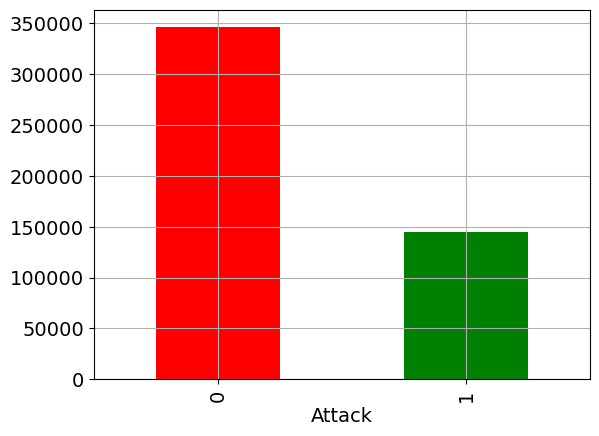

In [71]:
sample["Attack"].value_counts().plot(kind="bar",color=["red","green"])

# Balancing an unbalanced dataset

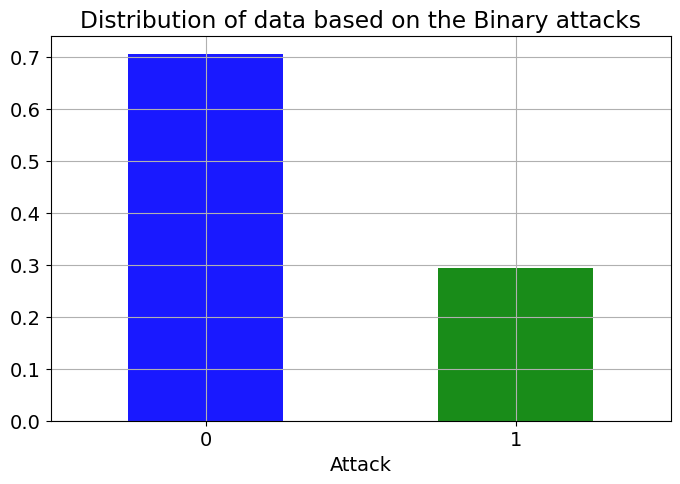

In [72]:
fig = plt.figure(figsize = (8,5))
sample.Attack.value_counts(normalize = True).plot(kind='bar', color= ['blue','green'], alpha = 0.9, rot=0)
plt.title('Distribution of data based on the Binary attacks')
plt.show()

In [73]:
#So, we can do Undersampling technique to balance the datasets otherwise As you can see, this model is only predicting 0, which means it’s completely ignoring the minority class in favor of the majority class.
df_majority = sample[sample.Attack == 0]
df_minority = sample[sample.Attack == 1]

In [74]:
df_majority_undersample = df_majority.sample(replace = False, n = 144503, random_state = 123)#random_state it's won't shuffle if we run this multiple time 

In [75]:
#for over sample we can use this code 
#df_minority_oversample = df_minority.sample(replace = True, n = 346026, random_state = 123)#random_state it's won't shuffle if we run this multiple time 

In [76]:
b_sample = pd.concat([df_majority_undersample, df_minority])
print(b_sample.Attack.value_counts())
b_sample.shape

Attack
0    144503
1    144503
Name: count, dtype: int64


(289006, 42)

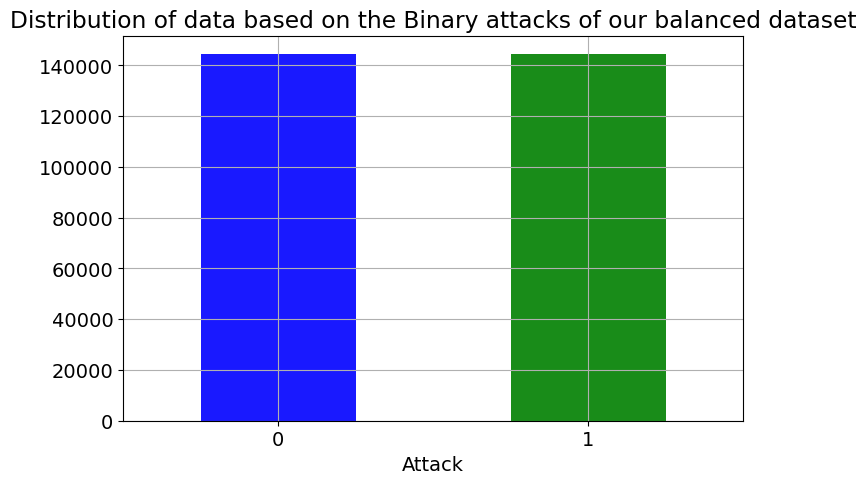

In [77]:
fig = plt.figure(figsize = (8,5))
b_sample.Attack.value_counts().plot(kind='bar', color= ['blue','green'], alpha = 0.9, rot=0)
plt.title('Distribution of data based on the Binary attacks of our balanced dataset')
plt.show()

##### Our dataset was highly unbalance 70% is normal 30% of attckers so we used under sampling technique to make the dataset balanced.Now, our datset is balanced.Now we are ready with our EDA Process.

In [78]:
#checking the null values 
sample.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag1                          0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count1                         0
srv_count                      0
serror_rate                    0
srv_error_rate                 0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [79]:
#checking the duplicate values 
b_sample.duplicated().sum()

1

In [80]:
#removing the duplicate value from our dataset 
b_sample.drop_duplicates(inplace=True)

In [81]:
#checking our statistical data 
b_sample.describe()

,duration,protocol_type,service,flag1,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Attack
count,289005.000000,289005.00000,289005.000000,289005.000000,289005.000000,289005.000000,289005.0,289005.0,2.890050e+05,289005.000000,...,289005.000000,289005.000000,289005.000000,289005.000000,289005.000000,289005.000000,289005.000000,289005.000000,289005.000000,289005.000000
mean,0.001057,0.00053,0.083978,0.033440,0.004214,0.017633,0.0,0.0,3.460148e-07,0.001958,...,0.118649,0.049114,0.004932,0.005173,0.001224,0.042085,0.042133,0.007519,0.007468,0.499998
std,0.029907,0.00264,0.113376,0.034046,0.034210,0.056981,0.0,0.0,1.860147e-04,0.035346,...,0.116327,0.046315,0.010062,0.016904,0.003313,0.049209,0.049328,0.025744,0.026102,0.500001
min,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000e+00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000e+00,0.000000,...,0.010000,0.004000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.00000,0.080000,0.000000,0.000070,0.000000,0.0,0.0,0.000000e+00,0.000000,...,0.028000,0.023000,0.005000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.00000,0.120000,0.070000,0.002550,0.010900,0.0,0.0,0.000000e+00,0.000000,...,0.255000,0.100000,0.007000,0.001000,0.001000,0.100000,0.100000,0.000000,0.000000,1.000000
max,1.000000,0.02000,0.670000,0.100000,1.000000,1.000000,0.0,0.0,1.000000e-01,1.000000,...,0.255000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,1.000000


In [82]:
b_sample

,duration,protocol_type,service,flag1,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Attack
47501,0.0,0.00,0.00,0.00,0.00254,0.00938,0,0.0,0.0,0.0,...,0.255,0.100,0.000,0.001,0.004,0.000,0.0,0.000,0.000,0
166295,0.0,0.00,0.00,0.00,0.00387,0.01770,0,0.0,0.0,0.0,...,0.255,0.100,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0
145803,0.0,0.00,0.00,0.00,0.00216,0.00375,0,0.0,0.0,0.0,...,0.255,0.100,0.000,0.007,0.005,0.000,0.0,0.000,0.000,0
5282,0.0,0.00,0.00,0.00,0.00300,0.03376,0,0.0,0.0,0.0,...,0.255,0.100,0.000,0.002,0.002,0.000,0.0,0.000,0.000,0
369070,0.0,0.00,0.00,0.05,0.00000,0.00000,0,0.0,0.0,0.0,...,0.252,0.100,0.000,0.004,0.023,0.000,0.0,0.100,0.087,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
842,0.0,0.02,0.09,0.00,0.01032,0.00000,0,0.0,0.0,0.0,...,0.090,0.035,0.002,0.035,0.000,0.002,0.0,0.000,0.000,1
1953,0.0,0.02,0.09,0.00,0.01032,0.00000,0,0.0,0.0,0.0,...,0.216,0.085,0.002,0.085,0.000,0.000,0.0,0.010,0.000,1
1278,0.0,0.02,0.09,0.00,0.01032,0.00000,0,0.0,0.0,0.0,...,0.037,0.015,0.004,0.015,0.000,0.027,0.0,0.002,0.000,1
12,0.0,0.02,0.09,0.00,0.01032,0.00000,0,0.0,0.0,0.0,...,0.013,0.008,0.002,0.008,0.000,0.000,0.0,0.000,0.000,1


In [83]:
b_sample.tail()

,duration,protocol_type,service,flag1,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Attack
842,0.0,0.02,0.09,0.0,0.01032,0.0,0,0.0,0.0,0.0,...,0.090,0.035,0.002,0.035,0.0,0.002,0.0,0.000,0.0,1
1953,0.0,0.02,0.09,0.0,0.01032,0.0,0,0.0,0.0,0.0,...,0.216,0.085,0.002,0.085,0.0,0.000,0.0,0.010,0.0,1
1278,0.0,0.02,0.09,0.0,0.01032,0.0,0,0.0,0.0,0.0,...,0.037,0.015,0.004,0.015,0.0,0.027,0.0,0.002,0.0,1
12,0.0,0.02,0.09,0.0,0.01032,0.0,0,0.0,0.0,0.0,...,0.013,0.008,0.002,0.008,0.0,0.000,0.0,0.000,0.0,1
2996,0.0,0.02,0.09,0.0,0.01032,0.0,0,0.0,0.0,0.0,...,0.245,0.096,0.001,0.096,0.0,0.000,0.0,0.000,0.0,1


# Feature Engineering 

#### Correlation analysis 

In [84]:
b_sample.corr().abs()

,duration,protocol_type,service,flag1,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Attack
duration,1.000000,0.002846,0.013157,0.027196,0.023533,0.037181,NaN,NaN,0.000351,0.008145,...,0.030940,0.028169,0.120851,0.106374,0.003371,0.028801,0.028972,0.066949,0.087669,0.011693
protocol_type,0.002846,1.000000,0.050891,0.197189,0.010512,0.060848,NaN,NaN,0.000373,0.011120,...,0.066617,0.110452,0.006964,0.429770,0.067146,0.169657,0.171474,0.038952,0.057439,0.043302
service,0.013157,0.050891,1.000000,0.652620,0.042909,0.222942,NaN,NaN,0.004201,0.015874,...,0.654453,0.673998,0.244958,0.085316,0.235878,0.592952,0.592628,0.123310,0.125053,0.664716
flag1,0.027196,0.197189,0.652620,1.000000,0.113234,0.301946,NaN,NaN,0.001827,0.051677,...,0.883339,0.915008,0.334586,0.218202,0.290404,0.914741,0.916920,0.144451,0.151814,0.949629
src_bytes,0.023533,0.010512,0.042909,0.113234,1.000000,0.039107,NaN,NaN,0.000144,0.173839,...,0.030209,0.068826,0.017422,0.069639,0.003828,0.104271,0.104646,0.024299,0.025676,0.056013
dst_bytes,0.037181,0.060848,0.222942,0.301946,0.039107,1.000000,NaN,NaN,0.000307,0.020648,...,0.317255,0.319660,0.139699,0.040687,0.116031,0.263359,0.263347,0.086476,0.083906,0.303216
land,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wrong_fragment,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
urgent,0.000351,0.000373,0.004201,0.001827,0.000144,0.000307,NaN,NaN,1.000000,0.000103,...,0.001881,0.000036,0.017574,0.004933,0.000687,0.001591,0.001589,0.000543,0.000532,0.001860
hot,0.008145,0.011120,0.015874,0.051677,0.173839,0.020648,NaN,NaN,0.000103,1.000000,...,0.024602,0.000135,0.008788,0.003794,0.015275,0.047084,0.047073,0.009939,0.010483,0.032011


In [85]:

correlation=b_sample.corrwith(b_sample.Attack).abs().sort_values(ascending=False)
co_d=pd.DataFrame(correlation)

In [86]:
co_d

,0
Attack,1.000000
same_srv_rate,0.956596
flag1,0.949629
dst_host_same_srv_rate,0.928103
logged_in,0.901505
dst_host_srv_count,0.898930
dst_host_srv_serror_rate,0.852594
srv_error_rate,0.851929
dst_host_serror_rate,0.851737
serror_rate,0.851278


##### We moving out with the 30% of cut of and we are going to delete all the variable where ever the relation is less than 30%

In [87]:
correlation[np.abs(correlation)>0.3].index.difference(['Attack'])

Index(['count1', 'diff_srv_rate', 'dst_bytes', 'dst_host_count',
       'dst_host_diff_srv_rate', 'dst_host_same_srv_rate',
       'dst_host_serror_rate', 'dst_host_srv_count',
       'dst_host_srv_diff_host_rate', 'dst_host_srv_serror_rate', 'flag1',
       'logged_in', 'same_srv_rate', 'serror_rate', 'service',
       'srv_diff_host_rate', 'srv_error_rate'],
      dtype='object')

In [88]:
#creating a copy of our sample dataset
corr_data=b_sample.copy()

In [89]:
#deleting the varibales where having the relation with t he y variable is more than 30%
correlation[np.abs(correlation)>0.3].index.difference(['Attack'])
final_corr_data=corr_data.loc[ : : ,['count1', 'diff_srv_rate', 'dst_bytes', 'dst_host_count',
       'dst_host_diff_srv_rate', 'dst_host_same_srv_rate',
       'dst_host_serror_rate', 'dst_host_srv_count',
       'dst_host_srv_diff_host_rate', 'dst_host_srv_serror_rate', 'flag1',
       'logged_in', 'same_srv_rate', 'serror_rate', 'service',
       'srv_diff_host_rate', 'srv_error_rate','Attack']]

In [90]:
final_corr_data

,count1,diff_srv_rate,dst_bytes,dst_host_count,dst_host_diff_srv_rate,dst_host_same_srv_rate,dst_host_serror_rate,dst_host_srv_count,dst_host_srv_diff_host_rate,dst_host_srv_serror_rate,flag1,logged_in,same_srv_rate,serror_rate,service,srv_diff_host_rate,srv_error_rate,Attack
47501,0.002,0.0,0.00938,0.113,0.000,0.100,0.000,0.255,0.004,0.0,0.00,0.1,0.1,0.0,0.00,0.008,0.0,0
166295,0.005,0.0,0.01770,0.255,0.000,0.100,0.000,0.255,0.000,0.0,0.00,0.1,0.1,0.0,0.00,0.023,0.0,0
145803,0.007,0.0,0.00375,0.014,0.000,0.100,0.000,0.255,0.005,0.0,0.00,0.1,0.1,0.0,0.00,0.000,0.0,0
5282,0.001,0.0,0.03376,0.043,0.000,0.100,0.000,0.255,0.002,0.0,0.00,0.1,0.1,0.0,0.00,0.000,0.0,0
369070,0.001,0.0,0.00000,0.025,0.000,0.100,0.000,0.252,0.023,0.0,0.05,0.0,0.1,0.0,0.00,0.000,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
842,0.511,0.0,0.00000,0.255,0.002,0.035,0.002,0.090,0.000,0.0,0.00,0.0,0.1,0.0,0.09,0.000,0.0,1
1953,0.478,0.0,0.00000,0.255,0.002,0.085,0.000,0.216,0.000,0.0,0.00,0.0,0.1,0.0,0.09,0.000,0.0,1
1278,0.511,0.0,0.00000,0.255,0.004,0.015,0.027,0.037,0.000,0.0,0.00,0.0,0.1,0.0,0.09,0.000,0.0,1
12,0.511,0.0,0.00000,0.158,0.002,0.008,0.000,0.013,0.000,0.0,0.00,0.0,0.1,0.0,0.09,0.000,0.0,1


In [91]:
#making copies for outlier treatment 
a=final_corr_data.copy()

In [92]:
#ploting heatmap 
# plt.figure(figsize = (30, 16))
# sns.heatmap(final_corr_data,annot=True, cmap='coolwarm')
# plt.show()

In [93]:
a.columns

Index(['count1', 'diff_srv_rate', 'dst_bytes', 'dst_host_count',
       'dst_host_diff_srv_rate', 'dst_host_same_srv_rate',
       'dst_host_serror_rate', 'dst_host_srv_count',
       'dst_host_srv_diff_host_rate', 'dst_host_srv_serror_rate', 'flag1',
       'logged_in', 'same_srv_rate', 'serror_rate', 'service',
       'srv_diff_host_rate', 'srv_error_rate', 'Attack'],
      dtype='object')

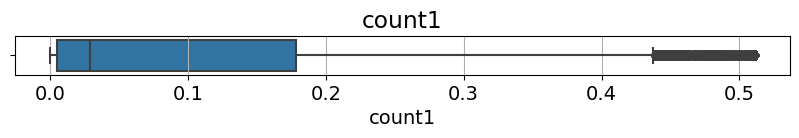

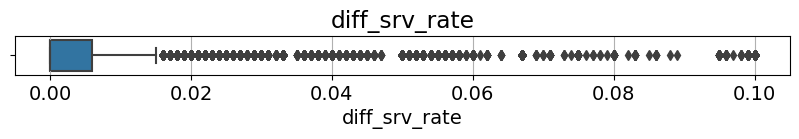

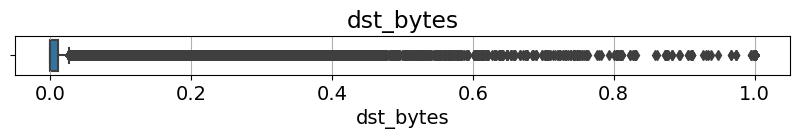

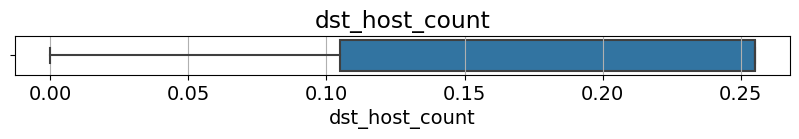

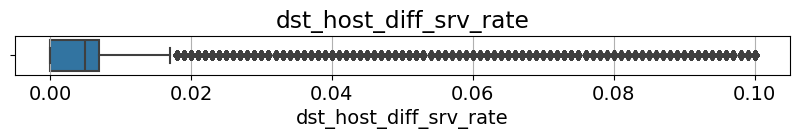

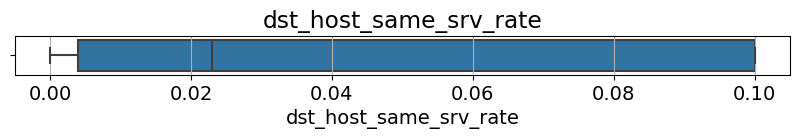

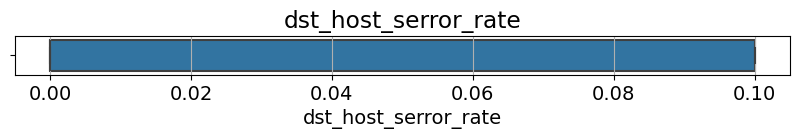

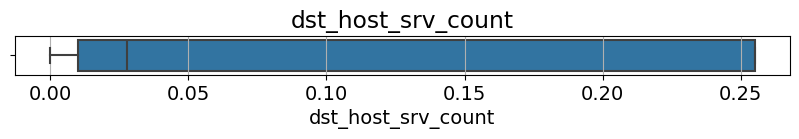

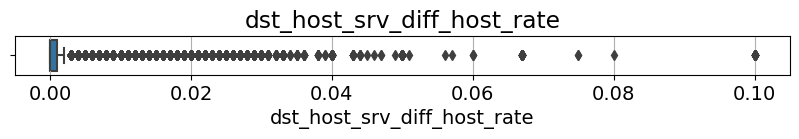

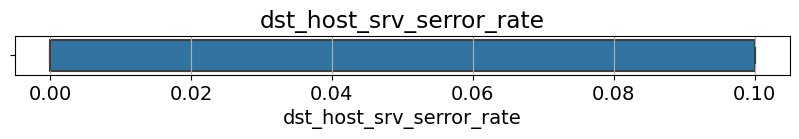

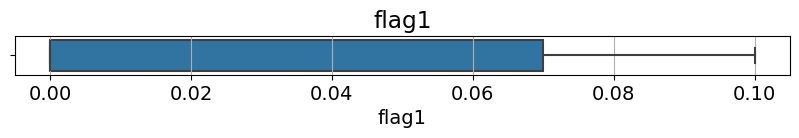

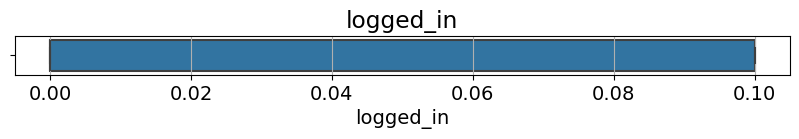

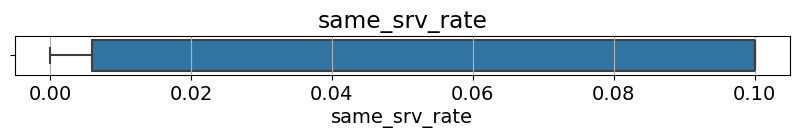

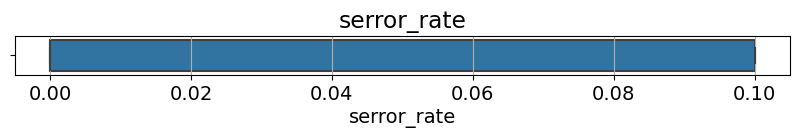

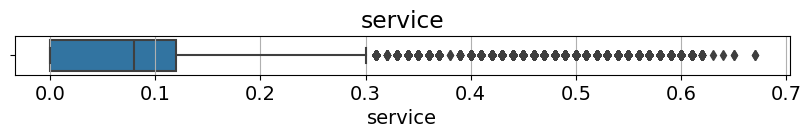

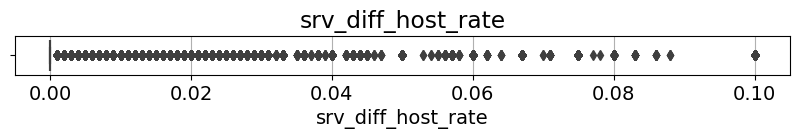

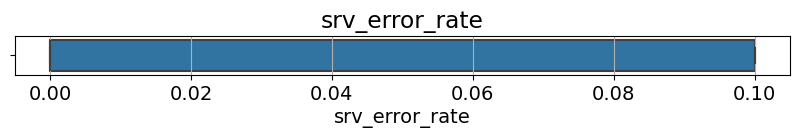

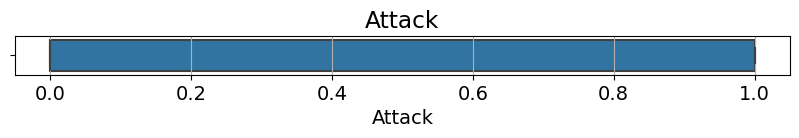

In [94]:
clmn=['count1', 'diff_srv_rate', 'dst_bytes', 'dst_host_count',
       'dst_host_diff_srv_rate', 'dst_host_same_srv_rate',
       'dst_host_serror_rate', 'dst_host_srv_count',
       'dst_host_srv_diff_host_rate', 'dst_host_srv_serror_rate', 'flag1',
       'logged_in', 'same_srv_rate', 'serror_rate', 'service',
       'srv_diff_host_rate', 'srv_error_rate','Attack']
for i in clmn:
    plt.figure(figsize=(10,0.5))
    sns.boxplot(x=a[i])
    plt.title(i)
    plt.show()

In [95]:
#udf of lower cutof and upper cutof 
def outliertreat_IQR(d):
    m = d.quantile(0.5)
    q1 = d.quantile(0.25)
    q3 = d.quantile(0.75)
    q_1p = d.quantile(0.01)
    q_99p = d.quantile(0.99)
    iqr = q3 - q1
    lc = q1 - 1.5*iqr
    uc = q3 + 1.5*iqr
    return lc,uc

In [96]:
a.apply(outliertreat_IQR)

,count1,diff_srv_rate,dst_bytes,dst_host_count,dst_host_diff_srv_rate,dst_host_same_srv_rate,dst_host_serror_rate,dst_host_srv_count,dst_host_srv_diff_host_rate,dst_host_srv_serror_rate,flag1,logged_in,same_srv_rate,serror_rate,service,srv_diff_host_rate,srv_error_rate,Attack
0,-0.2545,-0.009,-0.01635,-0.12,-0.0105,-0.140,-0.15,-0.3575,-0.0015,-0.15,-0.105,-0.15,-0.135,-0.15,-0.18,0.0,-0.15,-1.5
1,0.4375,0.015,0.02725,0.48,0.0175,0.244,0.25,0.6225,0.0025,0.25,0.175,0.25,0.241,0.25,0.30,0.0,0.25,2.5


In [97]:

a['count1'] = a.count1.clip(lower = -0.253, upper = 0.435)
a['diff_srv_rate'] = a.diff_srv_rate.clip(lower = -0.009, upper = 0.015)
a['dst_bytes'] = a.dst_bytes.clip(lower = -0.01632, upper = 0.02720)
a['dst_host_count'] = a.dst_host_count.clip(lower = -0.12, upper = 0.48)
a['dst_host_diff_srv_rate'] = a.dst_host_diff_srv_rate.clip(lower = -0.0105, upper = 0.0175)
a['dst_host_same_srv_rate'] = a.dst_host_same_srv_rate.clip(lower = -0.140, upper = 0.244)
a['dst_host_serror_rate'] = a.dst_host_serror_rate.clip(lower = -0.15, upper = 0.25)
a['dst_host_srv_count'] = a.dst_host_srv_count.clip(lower = -0.3575, upper = 0.6225)
a['dst_host_srv_diff_host_rate'] = a.dst_host_srv_diff_host_rate.clip(lower = -0.0015, upper = 0.0025)
a['dst_host_srv_serror_rate'] = a.dst_host_srv_serror_rate.clip(lower = -0.15, upper = 0.25)
a['flag1'] = a.flag1.clip(lower = -0.105, upper = 0.175)
a['logged_in'] = a.logged_in.clip(lower = -0.15, upper = 0.25)
a['same_srv_rate'] = a.same_srv_rate.clip(lower = -0.135, upper = 0.241)
a['serror_rate'] = a.serror_rate.clip(lower = -0.15, upper = 0.25)
a['service'] = a.service.clip(lower = -0.18, upper = 0.30)
a['srv_diff_host_rate'] = a.same_srv_rate.clip(lower = 0.0, upper = 0.0)
a['Attack'] = a.Attack.clip(lower =-1.5, upper = 2.5)

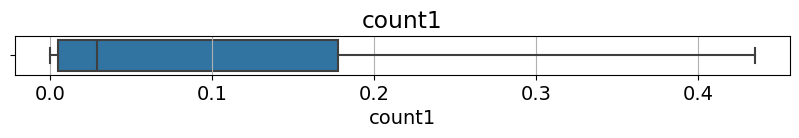

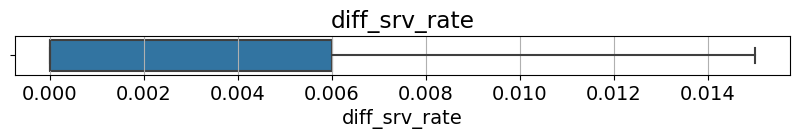

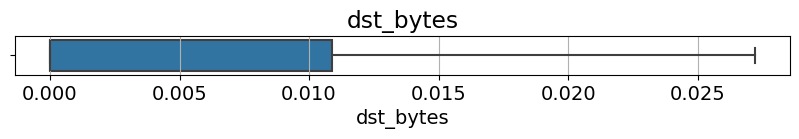

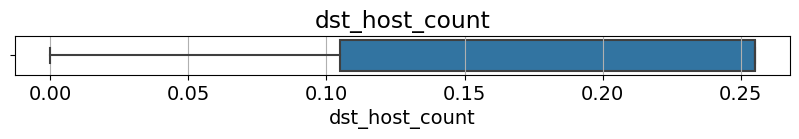

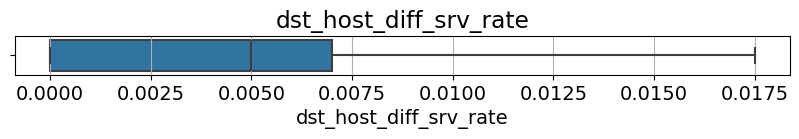

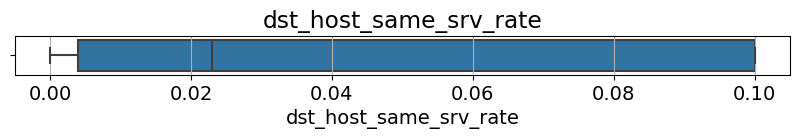

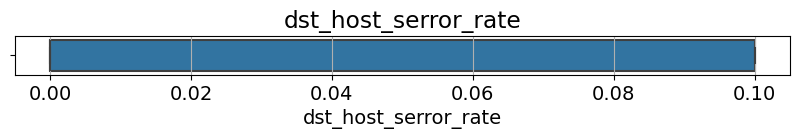

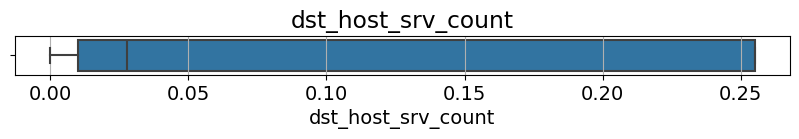

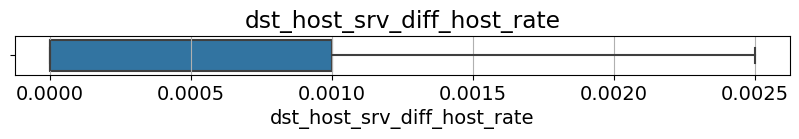

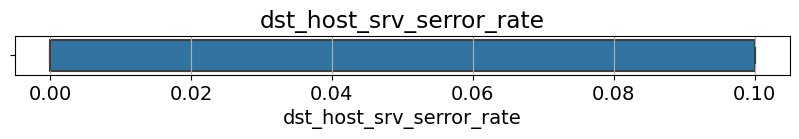

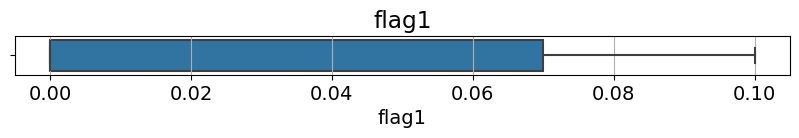

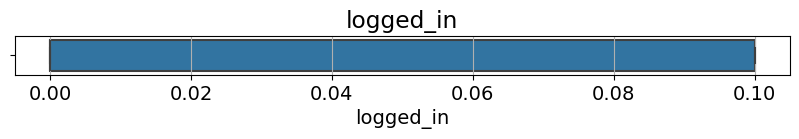

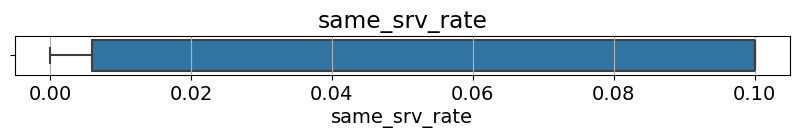

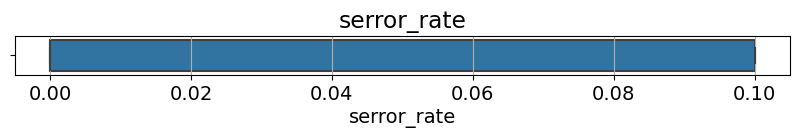

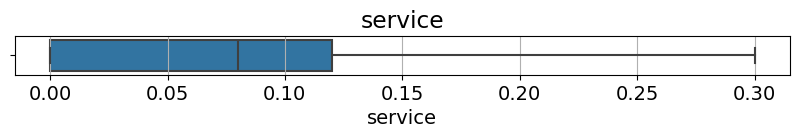

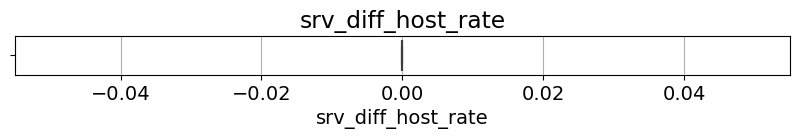

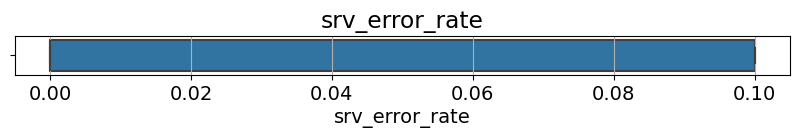

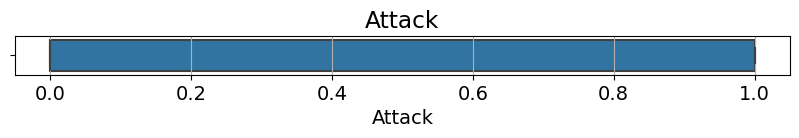

In [98]:
clmn=['count1', 'diff_srv_rate', 'dst_bytes', 'dst_host_count',
       'dst_host_diff_srv_rate', 'dst_host_same_srv_rate',
       'dst_host_serror_rate', 'dst_host_srv_count',
       'dst_host_srv_diff_host_rate', 'dst_host_srv_serror_rate', 'flag1',
       'logged_in', 'same_srv_rate', 'serror_rate', 'service',
       'srv_diff_host_rate', 'srv_error_rate','Attack']
for i in clmn:
    plt.figure(figsize=(10,0.5))
    sns.boxplot(x=a[i])
    plt.title(i)
    plt.show()

### we are done with our outlier treatment on our first copy

In [99]:
#dividing the data with traing data and testing data 
x=a.drop('Attack',axis=1)
y=a['Attack']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)#random_state will shuffel the data points

In [100]:
x_train.shape

(231204, 17)

In [101]:
x_test.shape

(57801, 17)

In [102]:
y_test.head

<bound method NDFrame.head of 489464    0
29015     1
189570    0
76186     1
216508    0
         ..
201711    1
280221    0
189847    0
369706    0
483110    0
Name: Attack, Length: 57801, dtype: int32>

# Building a decision Tree classifier model

In [103]:
#importing neccesary files
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier

In [104]:
ds=DecisionTreeClassifier(max_depth=3)

In [105]:
ds.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [106]:
test_pred=ds.predict(x_test)

In [107]:
train_pred=ds.predict(x_train)

In [108]:
print(accuracy_score(train_pred,y_train))

0.9920978875797997


In [109]:
dt_accu=accuracy_score(train_pred,y_train)

In [110]:
print(accuracy_score(test_pred,y_test))

0.991418833584194


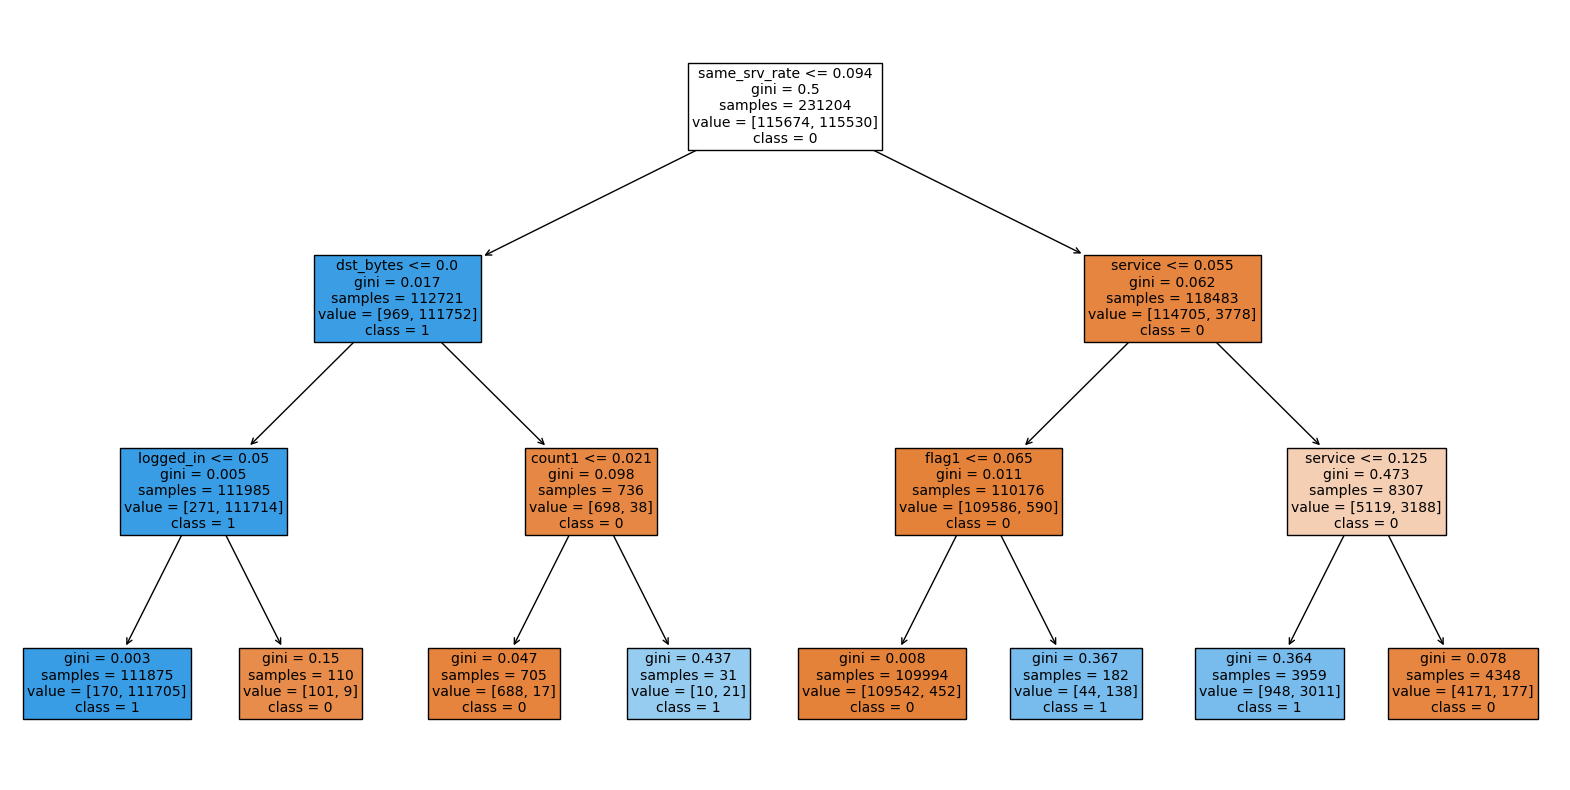

In [111]:
#8. building model using  decision trees classifier 
import matplotlib.pyplot as plt
from  sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(ds,feature_names=x.columns.tolist(),class_names=["0","1"],filled=True)
plt.show()

# Building Random Forest classifier Model 

In [112]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error

In [113]:
rfr=RandomForestClassifier(n_estimators=9,max_depth=5,random_state=42)

In [114]:
rfr.fit(x_train,y_train)

RandomForestClassifier(max_depth=5, n_estimators=9, random_state=42)

In [115]:
test_pred_rf=rfr.predict(x_test)

In [116]:
train_pred_rf=rfr.predict(x_train)

In [117]:
print(accuracy_score(train_pred_rf,y_train))

0.997076175152679


In [118]:
rdf_aucc=accuracy_score(train_pred_rf,y_train)

In [119]:
print(accuracy_score(test_pred_rf,y_test))

0.9966782581616235


In [120]:
mse = mean_squared_error(y_test, test_pred_rf)
print(f"Mean Squared Error: {mse:.2f}")

Mean Squared Error: 0.00


In [121]:
mse = mean_squared_error(y_train, train_pred_rf)
print(f"Mean Squared Error: {mse:.2f}")

Mean Squared Error: 0.00


# Building Logistic regression model 

In [122]:
#importing necessary library
from sklearn.linear_model import LogisticRegression

In [123]:
model = LogisticRegression()

In [124]:
model.fit(x_train, y_train)

LogisticRegression()

In [125]:
train_pred_logi=model.predict(x_train)

In [126]:
test_pred_logi = model.predict(x_test)

In [127]:
print(accuracy_score(train_pred_logi,y_train))

0.991708620958115


In [128]:
lr_aucc=accuracy_score(train_pred_logi,y_train)

In [129]:
print(accuracy_score(test_pred_logi,y_test))

0.9915226380166433


In [130]:
#printing classification report
print(classification_report(test_pred_logi,y_test))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     29159
           1       0.99      1.00      0.99     28642

    accuracy                           0.99     57801
   macro avg       0.99      0.99      0.99     57801
weighted avg       0.99      0.99      0.99     57801



# Building KNN model 

In [131]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [132]:
scaler = StandardScaler()

In [133]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [134]:
knn_model = KNeighborsClassifier(n_neighbors=5)

In [135]:
# Fit the model to your training data
knn_model.fit(x_train_scaled, y_train)

KNeighborsClassifier()

In [136]:
# Predict labels for test data
test_pred_knn = knn_model.predict(x_test_scaled)

In [137]:
train_pred_knn = knn_model.predict(x_train_scaled)

In [138]:
print(accuracy_score(train_pred_knn,y_train))

0.9984126572204634


In [139]:
knn_aucc=accuracy_score(train_pred_knn,y_train)

In [140]:
print(accuracy_score(test_pred_knn,y_test))

0.9976990017473746


# Building naive bayes model 

In [141]:
#Importing necessary library 
from sklearn.naive_bayes import GaussianNB

In [142]:
gnb = GaussianNB()

In [143]:
# fit the model
gnb.fit(x_train, y_train)

GaussianNB()

In [144]:
y_train_pred = gnb.predict(x_train)

In [145]:
y_train_pred = pd.Series(y_train_pred)

In [146]:
Model_data_train = pd.DataFrame(y_train)

In [147]:
Model_data_train

,Attack
499744,0
432554,0
29426,1
201771,0
67377,1
...,...
380438,0
45922,1
439906,0
157986,1


In [148]:
Model_data_train.shape

(231204, 1)

In [149]:
Model_data_train['y_pred'] = y_train_pred

In [150]:
pd.crosstab(Model_data_train.Attack,Model_data_train.y_pred, margins = True)

y_pred,0.0,1.0,All
Attack,,,
0,23646,22943,46589
1,58236,57294,115530
All,81882,80237,162119


In [151]:
from sklearn.metrics import confusion_matrix

data_table = confusion_matrix(y_train, y_train_pred)

print('Confusion matrix\n\n', data_table)

print('\nTrue Positives(TP) = ', data_table[0,0])

print('\nTrue Negatives(TN) = ', data_table[1,1])

print('\nFalse Positives(FP) = ', data_table[0,1])

print('\nFalse Negatives(FN) = ', data_table[1,0])


data_table.shape

Confusion matrix

 [[115104    570]
 [  1709 113821]]

True Positives(TP) =  115104

True Negatives(TN) =  113821

False Positives(FP) =  570

False Negatives(FN) =  1709


(2, 2)

<Axes: >

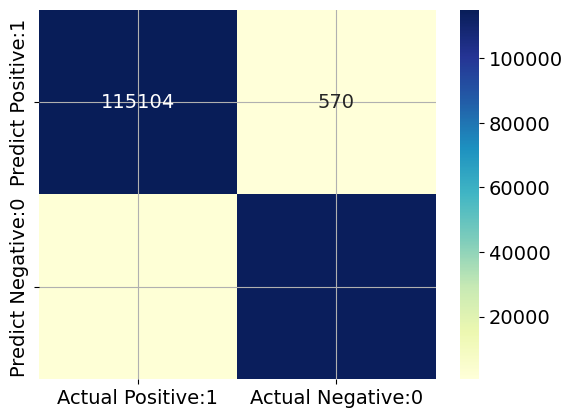

In [152]:
matrix = pd.DataFrame(data=data_table, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(matrix, annot=True, fmt='d', cmap='YlGnBu')

In [153]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99    115674
           1       1.00      0.99      0.99    115530

    accuracy                           0.99    231204
   macro avg       0.99      0.99      0.99    231204
weighted avg       0.99      0.99      0.99    231204



In [154]:
print('model accuracy-->{0:0.3f}'.format(accuracy_score(y_train,y_train_pred)))

model accuracy-->0.990


In [155]:
# Data validation on x_test
test_pred_naive=gnb.predict(x_test)

In [156]:
print(accuracy_score(test_pred_naive,y_test))

0.9895157523226242


# Creating  Ensamble Learning bagging Model 

In [157]:
from sklearn.ensemble import BaggingClassifier, BaggingRegressor,RandomForestClassifier,RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier,GradientBoostingRegressor, AdaBoostClassifier, AdaBoostRegressor

In [158]:
import sklearn
sorted(sklearn.metrics.SCORERS.keys()) 

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',

In [159]:
pargrid_ada = {'n_estimators': [5,10,15,20,25,30,35,40]}


In [160]:
gscv_bagging = GridSearchCV(estimator=BaggingClassifier(), 
                        param_grid=pargrid_ada, 
                        cv=5,
                        verbose=True, n_jobs=-1, scoring='roc_auc')

In [161]:
gscv_results = gscv_bagging.fit(x_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


In [162]:
gscv_results.best_params_

{'n_estimators': 40}

In [163]:
gscv_results.best_score_

0.999829930362969

In [164]:
print(metrics.roc_auc_score(y_train, pd.DataFrame(gscv_results.predict_proba(x_train))[1]))

0.9999921833710923


In [165]:
print(metrics.roc_auc_score(y_test, pd.DataFrame(gscv_results.predict_proba(x_test))[1]))

0.9998212961422964


In [166]:
# #Create a bar graph for knn, decision tree, random forest, and logistic regression
# models = ['KNN', 'Decision Tree', 'Random Forest', 'Naive Bayes',] 
# accuracy_values = [knn_accuracy, dt_accuracy, rf_accuracy, accuracy, accuracy, svm_accuracy, f1] plt.figure(figsize=(13, 5))
# # Plot the bar graph
# bars = plt.bar (models, accuracy_values, color=['blue', 'green', 'red 'orange', 'purple', 'skyblue', 'pink'])
# #Add accuracy values on top of each bar
# plt.bar_label (bars, labels = [f' (acc:.2f} for acc in accuracy_values])
# #Add Labels and title plt.xlabel('Models')
# plt.ylabel('Accuracy')
# plt.title('Accuracy Comparison for Different Models')
# #Show the plot
# plt.show()

SyntaxError: unterminated string literal (detected at line 5) (499018668.py, line 5)